In [12]:
using Test
using OffsetArrays
using JLD2
using Plots
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../test/test_functions.jl")

improve_χ_trace! (generic function with 1 method)

In [36]:
#gi, χ₀, χsp, χch, χsp_a, χch_a, χpp_a, U, β, shift = 
#    gen_synth(Nf, Nb, Nν_shell, shift)
Nν_shell = 10
testf = "../test/test_data/ED_s1.jld2"
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
n_iω = trunc(Int, size(χsp,3)/2);

# Spin Channel Tests

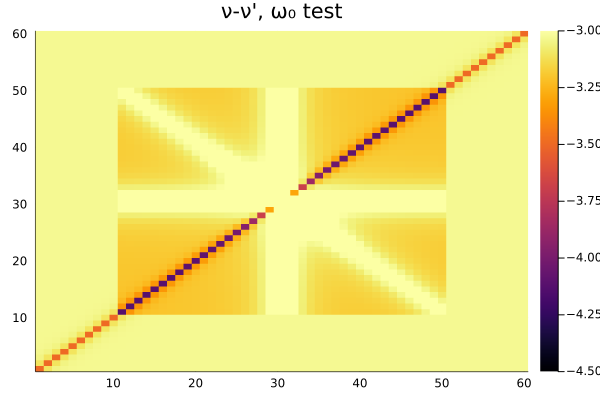

In [64]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += (U^2/2) * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - (U^2/2) * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-4.5,-3.0), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

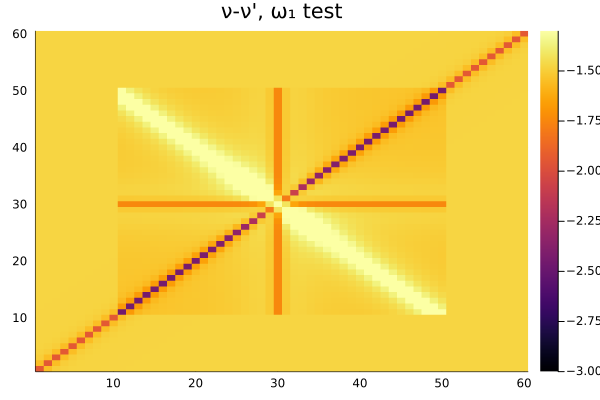

In [69]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2/2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - U^2/2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-3.0,-1.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

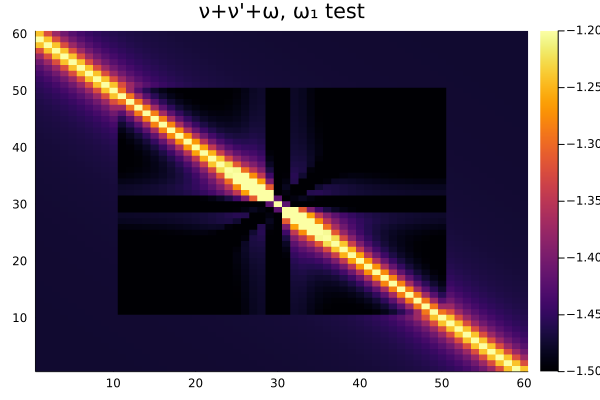

In [70]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-1.5,-1.2), title="ν+ν'+ω, ω₁ test")

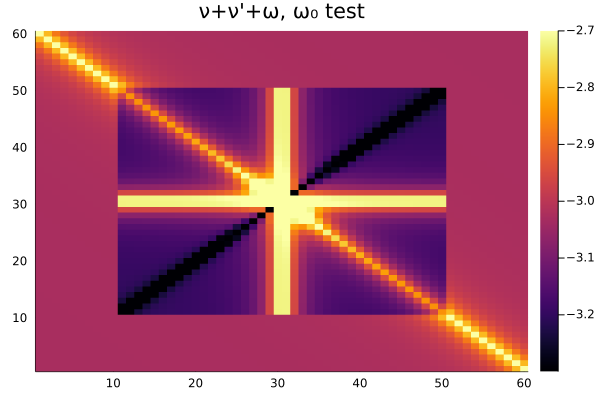

In [71]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
p = if ωi == 22
    heatmap(test, clim=(-1.3,-1.2), title="ν+ν'+ω, ω₀ test") #(-3.3,-2.7)
else
    heatmap(test, clim=(-3.3,-2.7), title="ν+ν'+ω, ω₀ test")
end
display(p)

# Charge Channel Test

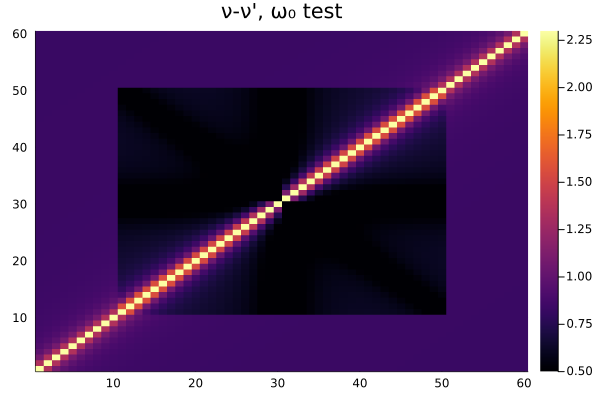

In [72]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 21
i_ch, Fch_tr, χch_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += (3/2)* U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

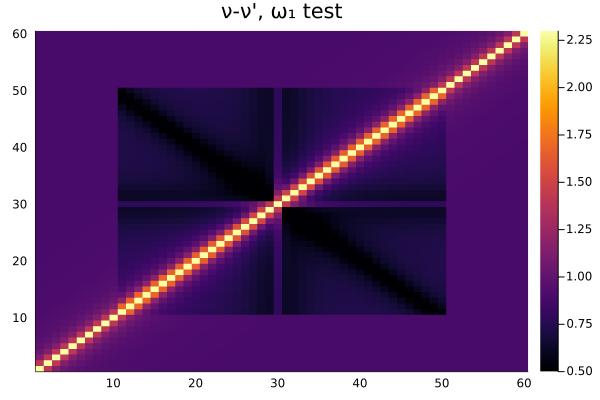

In [76]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 22
i_ch, Fch_tr, χch_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += (3/2)* U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

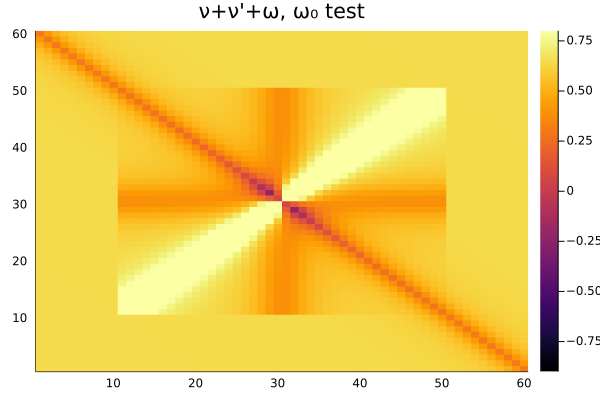

In [88]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.9,0.8), title="ν+ν'+ω, ω₀ test")

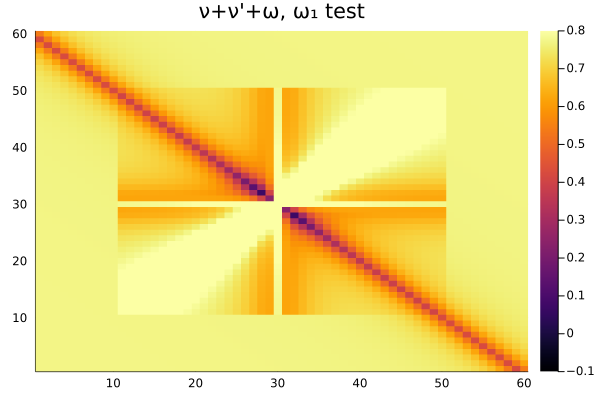

In [89]:
gImp, χ₀, χsp, χch, helper, U, β, shift = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, shift, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.1,0.8), title="ν+ν'+ω, ω₁ test")

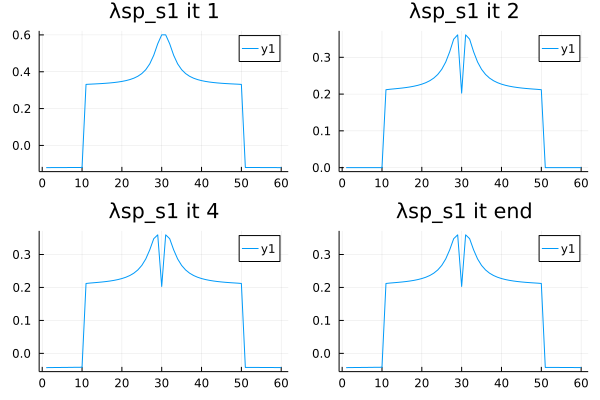

In [91]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λsp_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λsp_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λsp_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λsp_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

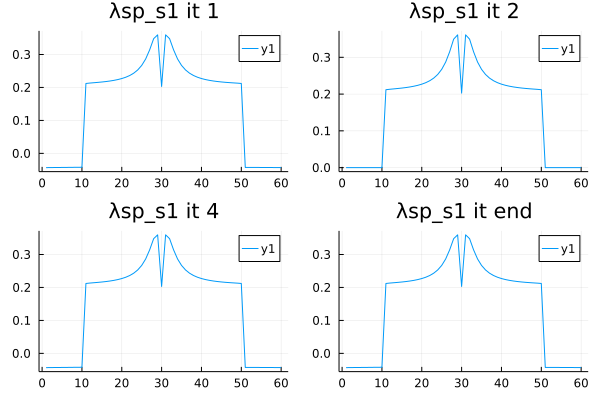

In [93]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

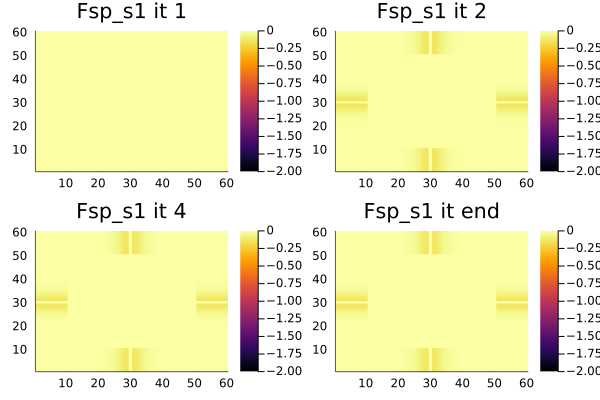

In [95]:
clim = (-2,0)#(-3.5,-2.5)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s1 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s1 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[4]), title="Fsp_s1 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

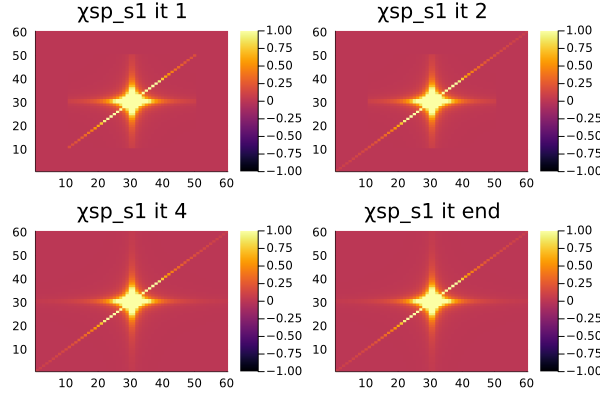

In [93]:
clim = (-1,1)
p1 = heatmap(real.(χsp_tr[1]), title="χsp_s1 it 1",clim=clim)
p2 = heatmap(real.(χsp_tr[2]), title="χsp_s1 it 2",clim=clim)
p3 = heatmap(real.(χsp_tr[4]), title="χsp_s1 it 4",clim=clim)
p4 = heatmap(real.(χsp_tr[end]), title="χsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

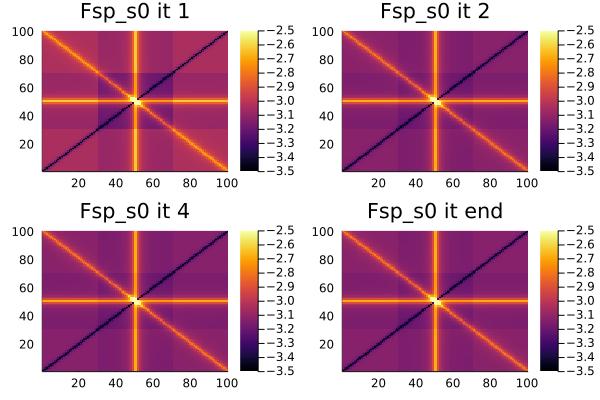

In [34]:
clim = (-3.5,-2.5)
p1 = heatmap(real.(Fsp_s0[2]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_s0[3]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_s0[4]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_s0[end]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

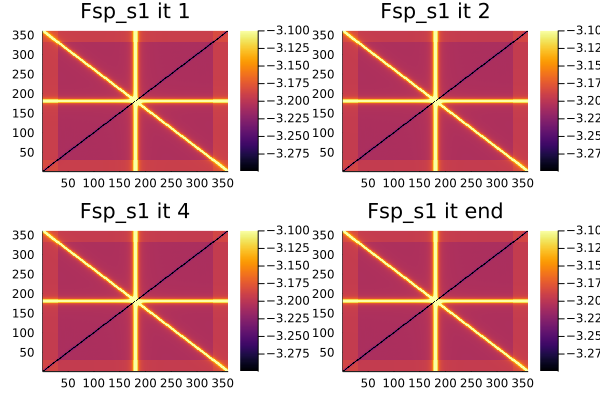

In [35]:
clim = (-3.3,-3.1)
p1 = heatmap(real.(Fsp_s1[2]), title="Fsp_s1 it 1",clim=clim)
p2 = heatmap(real.(Fsp_s1[3]), title="Fsp_s1 it 2",clim=clim)
p3 = heatmap(real.(Fsp_s1[4]), title="Fsp_s1 it 4",clim=clim)
p4 = heatmap(real.(Fsp_s1[end]), title="Fsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

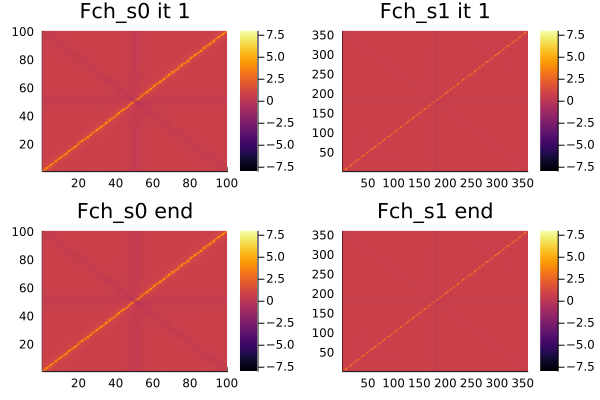

In [36]:
clim = (-8,8)
p11 = heatmap(real.(Fch_s0[2]), title="Fch_s0 it 1",clim=clim)
p21 = heatmap(real.(Fch_s1[2]), title="Fch_s1 it 1",clim=clim)
p31 = heatmap(real.(Fch_s0[end]), title="Fch_s0 end",clim=clim)
p41 = heatmap(real.(Fch_s1[end]), title="Fch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

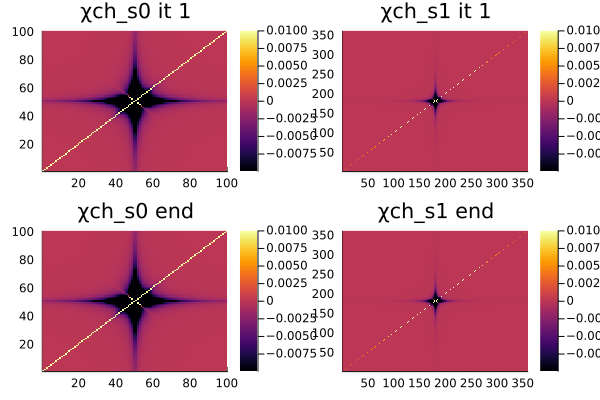

In [37]:
clim = (-0.01,0.01)
p11 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

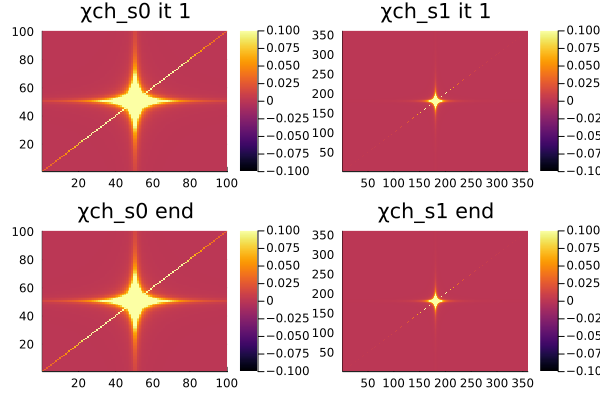

In [38]:
clim = (-0.1,0.1)
p11 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

In [39]:
rpad(0.0,8)

"0.0     "

In [41]:
imp_dens_s0 = 0.5*sum(real.(χDMFTsp_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTsp_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTsp_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTsp_impr_s1+χDMFTch_impr_s1))/β_s1^3
imp_dens_as_s0 = 0.5*real(sum(χ_ch_asympt_s0 .+ χ_sp_asympt_s0))/β_s0
imp_dens_as_s1 = 0.5*real(sum(χ_ch_asympt_s1 .+ χ_sp_asympt_s1))/β_s1
Ssp_impr_s0 = real(sum(χDMFTsp_impr_s0[:,:,21]))/β_s0^2
Ssp_naive_s0 = real(sum( χDMFTsp_s0[:,:,21]))/β_s0^2
Ssp_true_s0 =  real(χ_sp_asympt_s0[1])
Sch_impr_s0 = real(sum(χDMFTch_impr_s0[:,:,21]))/β_s0^2
Sch_naive_s0 = real(sum( χDMFTch_s0[:,:,21]))/β_s0^2
Sch_true_s0 = real(χ_ch_asympt_s0[1])
Ssp_impr_s1 = real(sum( χDMFTsp_impr_s1[:,:,151]))/β_s1^2
Ssp_naive_s1 = real(sum( χDMFTsp_s1[:,:,151]))/β_s1^2
Ssp_true_s1 = real(χ_sp_asympt_s1[1])
Sch_impr_s1 = real(sum( χDMFTch_impr_s1[:,:,151]))/β_s1^2
Sch_naive_s1 = real(sum( χDMFTch_s1[:,:,151]))/β_s1^2
Sch_true_s1 = real(χ_ch_asympt_s1[1])
println("                     s0 naiive      s0 improved      s1 naiive      s1 improved")
println(" n/2 (1 - n/2)     $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")
println(" n/2*(1 - n/2)(as) $(rpad(0.0,8))        $(round(imp_dens_as_s0,digits=8))      $(rpad(0.0,10))      $(round(imp_dens_as_s1,digits=8))      ")
println(" χsp(ω=0) true     $(rpad(0.0,8))        $(round(Ssp_true_s0,digits=8))      $(rpad(0.0,8))        $(round(Ssp_true_s1,digits=8))      ")
println(" χsp(ω=0)          $(round(Ssp_naive_s0,digits=8))      $(round(Ssp_impr_s0,digits=8))       $(round(Ssp_naive_s1,digits=8))      $(round(Ssp_impr_s1,digits=8))      ")
println(" χch(ω=0) true     $(rpad(0.0,8))        $(round(Sch_true_s0,digits=8))      $(rpad(0.0,8))        $(round(Sch_true_s1,digits=8))      ")
println(" χch(ω=0)          $(round(Sch_naive_s0,digits=8))       $(round(Sch_impr_s0,digits=8))      $(round(Sch_naive_s1,digits=8))      $(round(Sch_impr_s1,digits=8))      ")

                     s0 naiive      s0 improved      s1 naiive      s1 improved
 n/2 (1 - n/2)     0.10655486      0.19321203      0.14269089      0.16116186      
 n/2*(1 - n/2)(as) 0.0             0.17063648      0.0             0.17063648      
 χsp(ω=0) true     0.0             2.20818564      0.0             2.20818564      
 χsp(ω=0)          2.02099022      2.13072593       2.18264899      2.18688092      
 χch(ω=0) true     0.0             0.34813023      0.0             0.34813023      
 χch(ω=0)          0.3366906       0.34346315      0.34667931      0.3469208      


In [ ]:

imp_dens_s0 = 0.5*sum(real.(χDMFTch_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTch_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTch_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTch_impr_s1+χDMFTch_impr_s1))/β_s1^3
println("n/2 * (1 - n/2)     s0 naiive      s0 improved      s1 naiive      s1 improved")
println("                    $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")

In [ ]:
# Full 
                     s0 naiive      s0 improved      s1 naiive      s1 improved
 n/2 (1 - n/2)     0.10655486      0.19323526      0.14269089      0.16116186      
 n/2*(1 - n/2)(as) 0.0             0.17063648      0.0             0.17063648      
 χsp(ω=0) true     0.0             2.20818564      0.0             2.20818564      
 χsp(ω=0)          2.02099022      2.1307242       2.18264899      2.18688092      
 χch(ω=0) true     0.0             0.34813023      0.0             0.34813023      
 χch(ω=0)          0.3366906       0.34346704      0.34667931      0.3469208 

 # no λ edges

